In [1]:
## to run change the inference file output last line 

In [1]:
import torch
from sklearn.manifold import TSNE
from torchvision.models.feature_extraction import create_feature_extractor
import matplotlib.pyplot as plt
from matplotlib import patches
import torch.nn as nn
from models.baselines.mulsa.inference import MULSAInference
from models.baselines.mulsa.src.datasets.imi_datasets import ImitationEpisode
from models.baselines.mulsa.src.models.encoders import (
    make_vision_encoder,
    make_audio_encoder,
)
from models.baselines.mulsa.src.models.imi_models import Actor
from models.baselines.mulsa.src.engines.engine import ImiEngine
from models.baselines.cnnlstm.model import CNNLSTMWithResNetForActionPrediction
from models.baselines.cnn.model import LitModel
import numpy as np
import os
import yaml
from torch.utils.data import DataLoader

In [3]:
## Mulsa
config_path = '/home/punygod_admin/SoundSense/soundsense/models/baselines/mulsa/conf/imi/train.yaml'
with open(config_path) as f:
        config = yaml.load(f, Loader=yaml.FullLoader)

In [2]:
#mulsa
# model_path = "/home/punygod_admin/SoundSense/soundsense/models/baselines/mulsa/lightning_logs/mulsa_unimodal_simple_task_103-31-18:34:39/03-31-18:34:39.ckpt"
# v_encoder = make_vision_encoder(config['encoder_dim'])
# a_encoder = make_audio_encoder(config['encoder_dim'] * config['num_stack'], config['norm_audio'])

# model = Actor(v_encoder, a_encoder, config)
# model.load_state_dict(model_path)


# cnn + lstm 
# model_path = "/home/punygod_admin/SoundSense/soundsense/models/baselines/cnnlstm/lightning_logs/version_0/checkpoints/epoch=99-step=44900.ckpt"

# cnn
model_path = "/home/punygod_admin/SoundSense/soundsense/models/baselines/cnn/lightning_logs/version_3/checkpoints/epoch=44-step=20205.ckpt"

# model = MULSAInference.load_from_checkpoint(model_path).cuda()
# model = CNNLSTMWithResNetForActionPrediction.load_from_checkpoint(model_path).cuda()
model = LitModel.load_from_checkpoint(model_path).cuda()
# model.eval()

# feature_extractor_model = nn.Sequential(*list(model.children())[:-1])
# model = feature_extractor_model.to('cuda')

model.eval()

/home/punygod_admin/miniconda3/envs/muls/lib/python3.10/site-packages/pytorch_lightning/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.2.1, which is newer than your current Lightning version: v2.2.0.post0
Using cache found in /home/punygod_admin/.cache/torch/hub/pytorch_vision_v0.6.0
/home/punygod_admin/miniconda3/envs/muls/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/punygod_admin/miniconda3/envs/muls/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.war

LitModel(
  (encoder): Encoder(
    (video_backbone): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, e

In [5]:
np.random.seed(0)
run_ids = os.listdir('/home/punygod_admin/SoundSense/soundsense/data/hundred/data')
np.random.permutation(run_ids)
train_val_split = 0.8
split = int(train_val_split*len(run_ids))
train_episodes = run_ids[:split]
val_episodes = run_ids[split:]

print("Train episodes: ", len(train_episodes))
print("Val episodes: ", len(val_episodes))

# For CNN
config["augmentation"] = False

train_set = torch.utils.data.ConcatDataset(
    [
        ImitationEpisode(config, run_id)
        for run_id in train_episodes
    ]
)
val_set = torch.utils.data.ConcatDataset(
    [
        ImitationEpisode(config, run_id, train=False)
        for run_id in val_episodes
    ]
)

train_loader = DataLoader(train_set, config["batch_size"], num_workers=config["num_workers"])
val_loader = DataLoader(val_set, num_workers=config["num_workers"], shuffle=False,batch_size=1)

Train episodes:  80
Val episodes:  20


In [6]:
## CNN +LSTM


### Mulsa

In [ ]:
outputs_list = []
targets_list = []
indices = []

for i, (img, target) in enumerate(val_loader):
    # print(i, (img[0].shape), (img[1][0].shape), target.shape)
    # img[0] = [element[-1, :].cuda() for element in img[0]]
    img[0] = img[0][-1]
    # img[1] = img[1].cuda()
    # target = target[:,-1,:]
    # print(i, (img[0][0].shape), (img[1][0].shape), target.shape)
    if i > 999:
        break
    with torch.no_grad():
        _, _, output  = model(img)
    outputs_list.append(output)
    targets_list.append(target)
    indices.append(i)

In [ ]:
img[0].shape

torch.Size([6, 3, 75, 100])

## CNN

In [18]:
outputs_list = []
targets_list = []
indices = []

# model = nn.Sequential(*list(model.children())[:-1])

for i, (img, target) in enumerate(val_loader):
    # print(i, (img[0].shape), (img[1][0].shape), target.shape)
    # img[0] = [element[-1, :].cuda() for element in img[0]]
    img[0] = img[0].cuda()
    # img[1] = img[1].cuda()
    # target = target[:,-1,:]
    # print(i, (img[0][0].shape), (img[1][0].shape), target.shape)
    if i > 999:
        break
    with torch.no_grad():
        output  = model(img[0])
    outputs_list.append(output)
    targets_list.append(target)
    indices.append(i)

In [19]:

outputs = torch.cat(outputs_list, dim=0)
targets = torch.cat(targets_list, dim=0)

In [20]:
outputs.shape, targets.shape

(torch.Size([1000, 11]), torch.Size([1000, 11]))

In [21]:
outputs = outputs.view(outputs.size(0), -1).cpu().numpy()
targets = targets.cpu().numpy()

In [22]:
outputs.shape, targets.shape

((1000, 11), (1000, 11))

In [23]:
tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(outputs)
features_tsne.shape

(1000, 2)

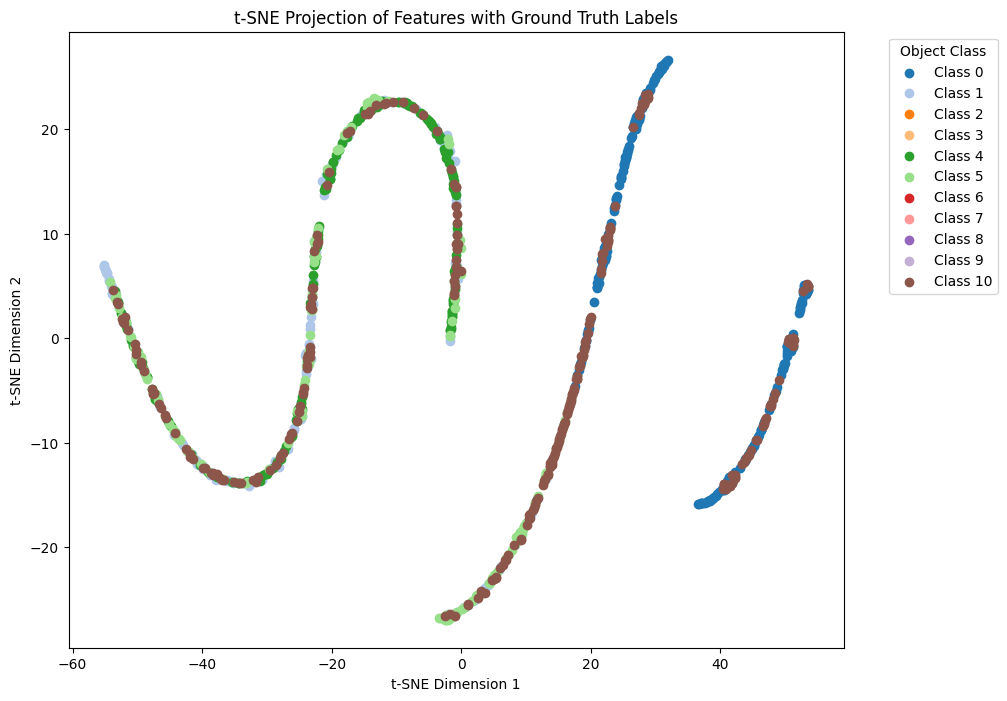

In [24]:
class_colors = plt.cm.tab20(np.arange(11))

plt.figure(figsize=(10, 8))
for i in range(11):
    indices = np.where(targets[:, i] == 1)[0]
    plt.scatter(features_tsne[indices, 0], features_tsne[indices, 1], label=f"Class {i}", color=class_colors[i])

plt.title('t-SNE Projection of Features with Ground Truth Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Object Class', bbox_to_anchor=(1.05, 1), loc='upper left')  